In [76]:
import numpy as np
import pandas as pd
import os
from neo4j import GraphDatabase
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
import pickle
import matplotlib.pyplot as plt
import re
import os
from sklearn.preprocessing import LabelEncoder

In [94]:
with open("export/df_train_imputed.pkl", "rb") as h:
    df_imp = pickle.load(h)
with open("export/train_label_encodings.pkl", 'rb') as h:
    enc = pickle.load(h)

In [88]:
cat_cols = [
    "DeviceInfo", "id_33", "id_31", "id_30", "R_emaildomain", "P_emaildomain",
    "ProductCD", "id_34", "card4", "M4", "id_23", "card6", "id_15", "id_37",
    "id_36", "id_38", "id_35", "DeviceType", "V65", "id_29", "id_28", "id_27",
    "V41", "V94", "id_16", "V88", "id_12", "V14"
]

In [96]:
# for k in enc:
#     print(len(enc[k].classes_))

In [98]:
# (df_train_onehot[cat_cols])
df_onehot = pd.get_dummies(df_imp, columns=cat_cols, prefix="dm")

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist2,C1,...,dm_1,dm_2,dm_0,dm_1,dm_2,dm_0,dm_1,dm_0,dm_1,dm_2
0,1.001227,50.000000,4497.0,514.0,150.0,102.0,420.000000,87.000000,226.697791,1.0,...,1,0,0,0,1,0,1,0,0,1
1,1.001562,15.000000,2803.0,100.0,150.0,226.0,337.000000,87.000000,226.507501,1.0,...,1,0,0,0,1,0,1,0,0,1
2,1.001725,75.887001,16496.0,352.0,117.0,134.0,300.664180,-508.852403,239.338202,1.0,...,0,0,0,1,0,0,1,0,1,0
3,1.001794,16.495001,4461.0,375.0,185.0,224.0,295.132378,-389.268907,30.000000,1.0,...,1,0,0,1,0,0,1,0,1,0
4,1.002546,30.000000,1790.0,555.0,150.0,226.0,170.000000,87.000000,226.407394,1.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,182.995394,48.876999,12019.0,305.0,106.0,224.0,298.777068,-409.641339,0.000000,1.0,...,0,0,0,1,0,0,1,0,1,0
144229,182.996250,250.000000,1214.0,174.0,150.0,226.0,272.000000,87.000000,224.470114,1.0,...,1,0,0,0,1,0,1,0,0,1
144230,182.996667,73.837997,5096.0,555.0,185.0,137.0,295.276861,-386.144694,238.646220,1.0,...,1,0,0,1,0,0,1,0,1,0
144231,182.996933,400.000000,6019.0,583.0,150.0,226.0,337.000000,87.000000,2296.000000,2.0,...,0,0,0,0,1,0,1,0,0,1


In [101]:
n_estimators = [50, 100, 200, 250, 300, 400, 500, 800]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50, 70, 90]
min_samples_split = [2, 4, 5, 10, 12]
min_samples_leaf = [1, 2, 4, 7, 9]
bootstrap = [True, False]

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1_score": make_scorer(f1_score)
}

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
}

model = RandomForestClassifier()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2022)

cv_scores = cross_validate(
    model, df_onehot.drop(axis=1, columns="isFraud"), df_onehot["isFraud"], scoring=scoring, cv=cv,
    n_jobs=-1, error_score='raise', verbose=2
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  5.6min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.7min finished


In [103]:
# cv_scores

{'fit_time': array([330.5850122 , 334.09761882, 330.89119363, 332.74922395,
        333.91909814, 332.91976905, 335.07600474, 328.5624187 ,
        328.76786852, 329.9367435 ]),
 'score_time': array([1.44513631, 1.03523445, 1.35936666, 1.27559018, 1.02126932,
        1.16288829, 0.91857862, 1.79220796, 1.80317998, 1.63662696]),
 'test_accuracy': array([0.96602884, 0.96505824, 0.96408763, 0.9678985 , 0.96658116,
        0.96602649, 0.96581848, 0.96928517, 0.96637315, 0.96706649]),
 'test_precision': array([0.95467422, 0.94101124, 0.93484419, 0.92930591, 0.9391069 ,
        0.95338983, 0.94190871, 0.9503268 , 0.9365722 , 0.94693878]),
 'test_recall': array([0.59540636, 0.59187279, 0.58303887, 0.63925729, 0.61361627,
        0.59628975, 0.60159011, 0.64222615, 0.6130742 , 0.61484099]),
 'test_f1_score': array([0.73340588, 0.72668113, 0.71817193, 0.75746464, 0.74224599,
        0.73369565, 0.73423181, 0.76647338, 0.74105713, 0.74558115])}

In [104]:
model = RandomForestClassifier()
model_tuned = RandomizedSearchCV(
    estimator=model, param_distributions=random_grid, n_iter=10,
    scoring=scoring, cv=cv, verbose=2, random_state=2022,
    n_jobs=-1, error_score="raise", refit="f1_score"
)

model_tuned.fit(df_onehot.drop(axis=1, columns="isFraud"), df_onehot["isFraud"])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2022, shuffle=True),
                   error_score='raise', estimator=RandomForestClassifier(),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 70,
                                                      90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 7, 9],
                                        'min_samples_split': [2, 4, 5, 10, 12],
                                        'n_estimators': [50, 100, 200, 250, 300,
                                                         400, 500, 800]},
                   random_state=2022, refit='f1_score',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'f1_score': make_scorer(f1_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                   verbose=2)

In [106]:
res_dict = model_tuned.cv_results_
print(f"""
Mean validation -results:
Accuracy: {np.round(res_dict["mean_test_accuracy"][0], 4)}
Precision: {np.round(res_dict["mean_test_precision"][0], 4)}
Recall: {np.round(res_dict["mean_test_recall"][0], 4)}
F1 score: {np.round(res_dict["mean_test_f1_score"][0], 4)}
""")


Mean validation results:
Accuracy: 0.962
Precision: 0.928
Recall: 0.5593
F1 score: 0.6977



In [29]:
class RF:
    def __init__(self, imp_datasets_dir=r"export/", y_train_path="export/df_train_y.pkl", target="isFraud",
                 seed=2022, cv_n_splits=10):
        self.imp_path = imp_datasets_dir
        self.y_train_path = y_train_path
        self.y_train = None
        self.target = target
        self.X_train_list, self.y_train_list = [], []
        self.seed = seed
        self.cv = StratifiedKFold(n_splits=cv_n_splits, shuffle=True, random_state=self.seed)
        self.scoring = {
            "accuracy": make_scorer(accuracy_score),
            "precision": make_scorer(precision_score),
            "recall": make_scorer(recall_score),
            "f1_score": make_scorer(f1_score)
        }
        self.cv_base_models, self.cv_scores, self.tuned_models = [], [], []
        self.cv_n_splits = cv_n_splits

    def load_data(self, x_final_pattern=r"X_final_", with_pickle=True):
        # Search for imputed datasets
        path_list = os.listdir(self.imp_path)

        if with_pickle:
            X_path_list = list(filter(re.compile(x_final_pattern+r"\d"+r"\.pkl").match, path_list))

            # Append those datasets to list
            for p in X_path_list:
                with open(self.imp_path+p, "rb") as h:
                    self.X_train_list.append(pickle.load(h))

            # Load target vector
            with open(self.y_train_path, "rb") as h:
                self.y_train = pickle.load(h)

        # Otherwise, load from .csv
        else:
            X_path_list = list(filter(re.compile(x_final_pattern+r"\d"+r"\.csv").match, path_list))
            for p in X_path_list:
                self.X_train_list.append(pd.read_csv(self.imp_path+p))

            self.y_train = pd.read_csv(self.y_train_path)

        return 0

    def cv_base_model(self, verbose=1):
        for X in self.X_train_list:
            model = RandomForestClassifier()

            cv_scores = cross_validate(
                model, X, self.y_train, scoring=self.scoring, cv=self.cv,
                n_jobs=-1, error_score='raise', verbose=verbose
            )

            self.cv_scores.append(cv_scores)
            self.cv_base_models.append(model)

        return 0

    def tune_model(self, verbose=1):
        for i in range(len(self.cv_base_models)):

            n_estimators = [50, 100, 200, 250, 300, 400, 500, 800]
            max_features = ['auto', 'sqrt']
            max_depth = [5, 10, 20, 30, 40, 50, 70, 90]
            min_samples_split = [2, 4, 5, 10, 12]
            min_samples_leaf = [1, 2, 4, 7, 9]
            bootstrap = [True, False]

            random_grid = {
                "n_estimators": n_estimators,
                "max_features": max_features,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split,
                "min_samples_leaf": min_samples_leaf,
                "bootstrap": bootstrap
            }

            cv = RepeatedStratifiedKFold(n_splits=self.cv_n_splits, n_repeats=3, random_state=self.seed)

            model_tuned = RandomizedSearchCV(
                estimator=self.cv_base_models[i], param_distributions=random_grid, n_iter=1,
                scoring=self.scoring, cv=cv, verbose=verbose, random_state=self.seed,
                n_jobs=-1, error_score="raise", refit="f1_score"
            )

            model_tuned.fit(self.X_train_list[i], self.y_train)

            self.tuned_models.append(model_tuned)

        return 0


In [30]:
rf = RF()

In [ ]:
rf.load_data()

In [ ]:
rf.cv_base_model(verbose=2)

In [ ]:
rf.tune_model(verbose=2)

In [42]:
train_probas = rf.tuned_models[0].best_estimator_.predict_proba(rf.X_train_list[0])

In [68]:
res_dict = rf.tuned_models[0].cv_results_
print(f"""
Mean validation results:
Accuracy: {np.round(res_dict["mean_test_accuracy"][0], 4)}
Precision: {np.round(res_dict["mean_test_precision"][0], 4)}
Recall: {np.round(res_dict["mean_test_recall"][0], 4)}
F1 score: {np.round(res_dict["mean_test_f1_score"][0], 4)}
""")


Mean validation results:
Accuracy: 0.3423
Precisioon: 0.1442
Recall: 0.4075
F1 score: 0.1209



In [46]:
def plot_roc(pred_probas, real_labels, save_plot=False, save_dir=r"visualizations/"):
    fpr, tpr, threshold = roc_curve(real_labels, pred_probas)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    if save_plot:
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)
        plt.savefig(save_dir+r"roc_auc_baseline.png")

    plt.show()

    return 0


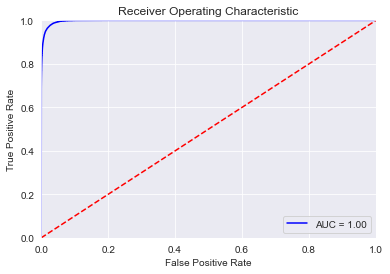

0

In [55]:
plot_roc(train_probas[:,1], rf.y_train.codes)

In [63]:
rf.tuned_models[0].best_estimator_.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [4]:
class preprocessing_elliptic:
    def __init__(self,
                 classes_path=r"data/elliptic_txs_classes.csv",
                 edgelist_path=r"data/elliptic_txs_edgelist.csv",
                 features_path=r"data/elliptic_txs_features.csv",
                 printable=False):
        if printable:
            print("Loading Elliptic Dataset")
        df_classes = pd.read_csv(classes_path)
        df_features = pd.read_csv(features_path, header=None)
        self.df_nodes = df_classes.merge(df_features, left_on="txId", right_on=0)
        self.df_nodes["class"] = self.df_nodes["class"].replace({"unknown": 3}).astype("int64")
        self.df_nodes["label"] = "node"
        self.df_edges = pd.read_csv(edgelist_path)
        self.df_edges["type"] = "transaction"

    def export_neo4j(self, export_path=r"export/"):
        if not os.path.isdir(export_path):
            os.mkdir(export_path)

        # Save nodes and edges prepared for Neo4j import
        self.df_nodes.to_csv(export_path+"nodes_neo4j.csv", header=False, index=False)
        self.df_edges.to_csv(export_path+"edges_neo4j.csv", header=False, index=False)

        # Save headers for nodes and edges dataframes prepared for Neo4j import
        feature_types = self.df_nodes.dtypes.replace({"int64":"int", "float64": "float", "object": "string"}).tolist()
        indices = self.df_nodes.dtypes.index
        feature_header = [str(x)+":"+y for x,y in zip(indices, feature_types)]
        feature_header[0] = "id:ID"
        feature_header[-1] = ":LABEL"
        np.savetxt(export_path+"nodes_header.csv", (feature_header, ), delimiter=",", fmt="% s")

        edges_header = self.df_edges.columns.tolist()
        edges_header = [str(x)+y for x,y in zip(edges_header, [":START_ID", ":END_ID", ":TYPE"])]
        np.savetxt(export_path+"edges_header.csv", (edges_header, ), delimiter=",", fmt="% s")

        return 0



In [5]:
prel = preprocessing_elliptic(printable=True)

Loading Elliptic Dataset


In [103]:
# prel.export_neo4j()

0

In [1]:
from graphdatascience import GraphDataScience

In [6]:
class neo4j_con:
    def __init__(self, uri="bolt://localhost:7687", db="neo4j", password="password",
                 graph_name="elliptic", node_label="node", rel_type="transaction"):
        self.gds = GraphDataScience(uri, auth=(db, password))
        self.graph_name = graph_name
        self.node_label = node_label
        self.rel_type = rel_type

    def create_graph(self):
        try:
            self.gds.run_cypher(
                f"""
                CALL gds.graph.project(
                   '{self.graph_name}',
                   '{self.node_label}',
                   '{self.rel_type}'
                )
                """
            )
            print("Graph succesfully created")
        except:
            print("Graph already exists")

    def run(self, query=""):
        return self.gds.run_cypher(query)


In [73]:
# con.gds.

In [9]:
con = neo4j_con()
con.create_graph()

Graph succesfully created


In [23]:
# G = con.gds.graph.get("elliptic")
# G.node_count()
# G.drop()

In [28]:
degree = con.run(
    """
    call gds.degree.stream("elliptic")
    yield nodeId, score
    return toInteger(gds.util.asNode(nodeId).id) as id, score
    order by score desc, id asc
    """
)

In [29]:
degree.dtypes

id         int64
score    float64
dtype: object

In [30]:
# prel.df_nodes
degree.merge(prel.df_nodes, left_on="id", right_on="txId")
# degree.id

,id,score,txId,class,0,1,2,3,4,5,...,158,159,160,161,162,163,164,165,166,label
0,2984918,472.0,2984918,2,2984918,22,1.684981,-0.210553,-1.756361,-0.121970,...,1.166103,0.014801,0.080531,-0.098889,0.066306,-0.092140,-0.120107,-0.184471,-0.253774,node
1,89273,288.0,89273,2,89273,1,5.202107,-0.210553,-1.756361,-0.121970,...,0.982479,0.118347,0.091066,-0.098889,0.854508,-0.066727,-0.150067,-0.080760,-0.070977,node
2,102570,122.0,102570,3,102570,36,0.381067,23.514872,2.128587,-0.046932,...,-0.075586,0.309574,0.635122,-0.098889,19.117743,1.948685,-0.026396,-0.039786,-0.795452,node
3,3181,112.0,3181,2,3181,34,1.305212,-0.210553,-1.756361,-0.121970,...,1.590664,0.059948,0.113967,-0.098889,1.969527,0.037532,-0.131010,0.006994,0.017772,node
4,7952,99.0,7952,2,7952,48,0.967162,-0.210553,-1.756361,-0.121970,...,0.850443,0.321431,0.268810,-0.098889,1.162100,0.485146,0.303509,-0.553520,-0.578865,node
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,401339607,0.0,401339607,3,401339607,12,-0.165038,-0.184668,-1.201369,0.028105,...,-0.588384,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,node
203765,403137299,0.0,403137299,3,403137299,28,-0.172669,-0.158783,-1.201369,-0.121970,...,-0.626229,0.241128,0.241406,-0.216057,-0.125939,-0.131155,-0.269818,-0.120613,-0.119792,node
203766,403234712,0.0,403234712,3,403234712,28,-0.172669,-0.158783,-1.201369,-0.121970,...,-0.626229,0.241128,0.241406,-0.216057,-0.125939,-0.131155,-0.269818,-0.120613,-0.119792,node
203767,403234715,0.0,403234715,3,403234715,28,-0.172669,-0.158783,-1.201369,-0.121970,...,-0.626229,0.241128,0.241406,-0.216057,-0.125939,-0.131155,-0.269818,-0.120613,-0.119792,node
